In [32]:
from statistics import mean
import numpy as np
import random

In [20]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

In [17]:
xs = np.array([1,2,3,4,5,6], dtype=np.float64)
ys = np.array([5,4,6,5,6,7], dtype=np.float64)

In [40]:
def create_dataset(hm, variance, step=2, correlation=False):
    val = 1
    ys = []
    
    for i in range(hm):
        y = val + random.randrange(-variance, variance)
        ys.append(y)
        if correlation and correlation == 'pos':
            val += step
        elif correlation and correlation == 'neg':
            val -= step
            
    xs = [i for i in range(len(ys))]
    
    return np.array(xs, dtype=np.float64), np.array(ys, dtype=np.float64)

In [41]:
def best_fit_slope_n_intercept(xs, ys):
    m = ((mean(xs)*mean(ys)) - mean(xs*ys)) / ((mean(xs)**2) - mean(xs**2))
    b = mean(ys) - m*mean(xs)
    return m, b

In [42]:
def squared_error(y_orig, y_line):
    return sum((y_line-y_orig)**2)

In [43]:
def coefficient_of_determination(ys_orig, y_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, y_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    
    return 1 - (squared_error_regr / squared_error_y_mean)

In [65]:
xs, ys = create_dataset(50, 10, 2, correlation='pos')

In [66]:
m, b = best_fit_slope_n_intercept(xs, ys)
print(m, b)

2.098199279711884 -2.6658823529411535


In [67]:
regression_line = [(m*x)+b for x in xs]

In [68]:
r_squared = coefficient_of_determination(ys,regression_line)
print(r_squared)

0.967064179737009


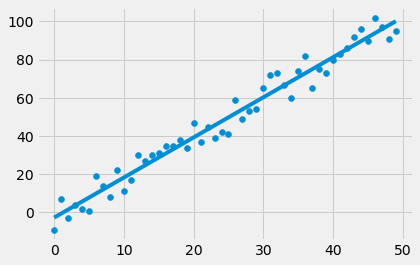

In [69]:
plt.scatter(xs,ys)
plt.plot(xs,regression_line)